<a href="https://colab.research.google.com/github/NayeonKeum/ToyProjects/blob/master/cafe/randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from IPython.display import Image

import pandas as pd
import numpy as np

import pydotplus 
import os

In [ ]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_2020cafe/data_inheo.csv")
data

,Unnamed: 0,사업장명,시설총규모,업소위치분기,distance,성공여부,창업월,구_1_25,프랜차이즈여부_02,sub_19
0,0,삼광다방,74.47,1,0.26746,1,9,5,0,3
1,1,대경,99.21,1,0.29035,1,9,5,0,3
2,2,국빈다방,32.00,1,0.33209,1,8,5,0,4
3,3,나드리커피숍,139.00,1,0.23171,1,12,5,0,5
4,4,석다방,115.84,1,0.05603,1,7,5,0,5
...,...,...,...,...,...,...,...,...,...,...
30074,33815,기로,57.12,1,1.64902,1,11,10,0,2
30075,33816,날쌘카페 천호점,18.00,1,0.44499,1,12,10,0,9
30076,33817,스타벅스 명일역점,367.57,1,2.00144,1,12,10,2,2
30077,33818,더원카페(The one caffe),44.50,1,1.32787,0,12,10,0,2


In [ ]:
data=data.dropna(axis=0)
data_delname=data.drop(['사업장명'],axis=1)
data_delname=data_delname.dropna(axis=0)

In [ ]:
data_delname.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30079 entries, 0 to 30078
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30079 non-null  int64  
 1   시설총규모       30079 non-null  float64
 2   업소위치분기      30079 non-null  int64  
 3   distance    30079 non-null  float64
 4   성공여부        30079 non-null  int64  
 5   창업월         30079 non-null  int64  
 6   구_1_25      30079 non-null  int64  
 7   프랜차이즈여부_02  30079 non-null  int64  
 8   sub_19      30079 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 2.3 MB


In [ ]:
data_delname.columns=['whatever','size','floor_012','dist','success_01','StartM','gu1_25','franch_012','sub_1_9']

In [ ]:
data_delname.head()

,whatever,size,floor_012,dist,success_01,StartM,gu1_25,franch_012,sub_1_9
0,0,74.47,1,0.26746,1,9,5,0,3
1,1,99.21,1,0.29035,1,9,5,0,3
2,2,32.00,1,0.33209,1,8,5,0,4
3,3,139.00,1,0.23171,1,12,5,0,5
4,4,115.84,1,0.05603,1,7,5,0,5


In [ ]:
X=np.array(pd.DataFrame(data_delname,columns=['size','floor_012','dist','StartM','gu1_25','franch_012','sub_1_9']))


In [ ]:
y=np.array(pd.DataFrame(data_delname,columns=['success_01']))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [ ]:
X_train

array([[5.61000e+01, 1.00000e+00, 5.91330e-01, ..., 1.00000e+01,
        0.00000e+00, 9.00000e+00],
       [5.28000e+01, 1.00000e+00, 2.58020e-01, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [2.64000e+01, 1.00000e+00, 2.87468e+00, ..., 1.00000e+00,
        0.00000e+00, 3.00000e+00],
       ...,
       [5.08400e+01, 1.00000e+00, 6.28290e-01, ..., 2.00000e+01,
        0.00000e+00, 5.00000e+00],
       [1.10400e+02, 1.00000e+00, 5.66220e-01, ..., 4.00000e+00,
        0.00000e+00, 2.00000e+00],
       [1.76160e+02, 1.00000e+00, 1.27080e-01, ..., 1.10000e+01,
        0.00000e+00, 1.00000e+00]])

In [ ]:
#학습-PRUNING
rf_clf = RandomForestClassifier(n_estimators=10)
rf_clf = rf_clf.fit(X_train, y_train)
#extract single tree
estimator = rf_clf.estimators_[5]
#feature_names
feature_names = data_delname.columns.tolist()
feature_names = feature_names[1:4]+feature_names[5:]
#target_name
target_names = np.array(['success', 'fail'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#그래프
!pip install graphviz

In [ ]:
os.environ["PATH"] += os.pathsep + '/usr/local/lib/python3.6/dist-packages (0.10.1)'

In [ ]:
from sklearn.tree import export_graphviz
# Export
rf_dot_data=export_graphviz(estimator, out_file=None, 
                feature_names = feature_names,
                class_names = target_names,
                rounded = True, proportion = False, 
                precision = 2, #소숫점자리수
                filled = True,
                special_characters = True,
                max_depth=5)


In [ ]:
rf_graph = pydotplus.graph_from_dot_data(rf_dot_data)

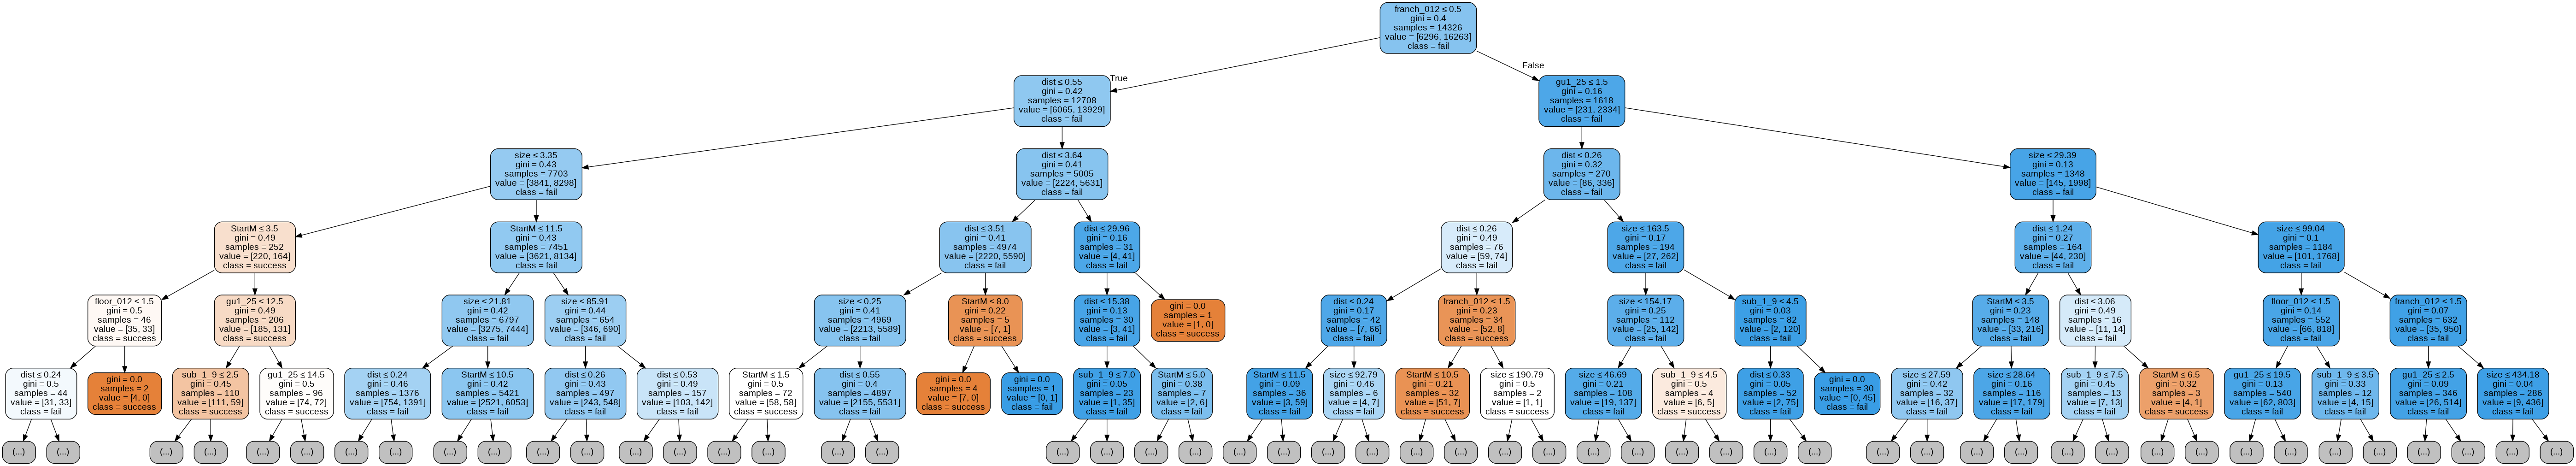

In [ ]:
Image(rf_graph.create_png())#